In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(os.path.join(dirname))
    

/kaggle/input
/kaggle/input/jute-leaf-disease-detection
/kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection
/kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection/Healthy Leaf
/kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection/Cescospora Leaf Spot
/kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection/Golden Mosaic


In [3]:
import os

dataset_dir = '/kaggle/input/jute-leaf-disease-detection'

# List all files and folders in the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f"  File: {filename}")
        

Directory: /kaggle/input/jute-leaf-disease-detection
Directory: /kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection
Directory: /kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection/Healthy Leaf
  File: Healthy (125).jpg
  File: Healthy (108).jpg
  File: Healthy (46).jpg
  File: Healthy (230).jpg
  File: Healthy (10).jpg
  File: Healthy (23).jpg
  File: Healthy (75).jpg
  File: Healthy (149).jpg
  File: Healthy (147).jpg
  File: Healthy (233).jpg
  File: Healthy (17).jpg
  File: Healthy (131).jpg
  File: Healthy (102).jpg
  File: Healthy (249).jpg
  File: Healthy (157).jpg
  File: Healthy (42).jpg
  File: Healthy (64).jpg
  File: Healthy (140).jpg
  File: Healthy (165).jpg
  File: Healthy (133).jpg
  File: Healthy (95).jpg
  File: Healthy (246).jpg
  File: Healthy (103).jpg
  File: Healthy (53).jpg
  File: Healthy (14).jpg
  File: Healthy (93).jpg
  File: Healthy (70).jpg
  File: Healthy (138).jpg
  File: Healthy (228).jpg
  File: Healthy (135).jpg
  Fi

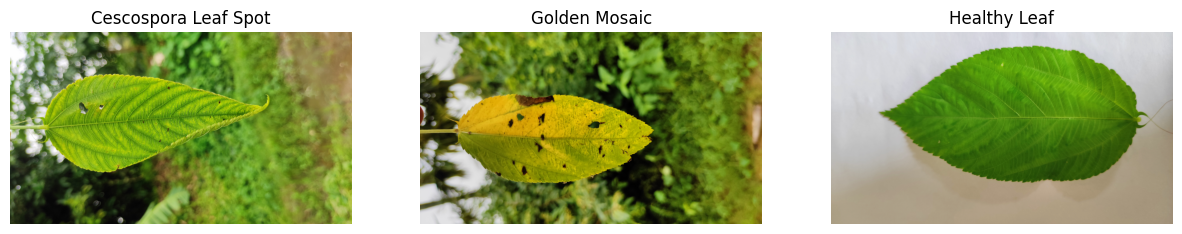

In [4]:
import os
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread

# Define the full dataset directory
dataset_dir = '/kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection'

# Updated classes list with correct folder names
classes = ['Cescospora Leaf Spot', 'Golden Mosaic', 'Healthy Leaf']

# Function to display a random image from each folder
def display_random_images(dataset_dir, classes):
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))  # Create subplots for each class
    
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)  # Path to the folder
        try:
            image_file = random.choice(os.listdir(class_dir))  # Randomly select an image file
            image_path = os.path.join(class_dir, image_file)   # Full path to the image
            
            # Load and display the image
            image = imread(image_path)
            axes[i].imshow(image)
            axes[i].set_title(class_name)
            axes[i].axis('off')  # Hide axes for better visualization
        
        except FileNotFoundError:
            print(f"Folder {class_dir} not found. Please check the folder name.")
            axes[i].set_title(f"{class_name} (Not Found)")
            axes[i].axis('off')  # Still hide axes for consistency
    
    plt.show()

# Call the function to display one image from each class
display_random_images(dataset_dir, classes)



Preprocessing and augmenting Healthy Leaf images...
Preprocessing and augmenting Cescospora Leaf Spot images...
Preprocessing and augmenting Golden Mosaic images...
Preprocessing complete. Preprocessed images are saved.
Visualizing preprocessed Healthy Leaf images:


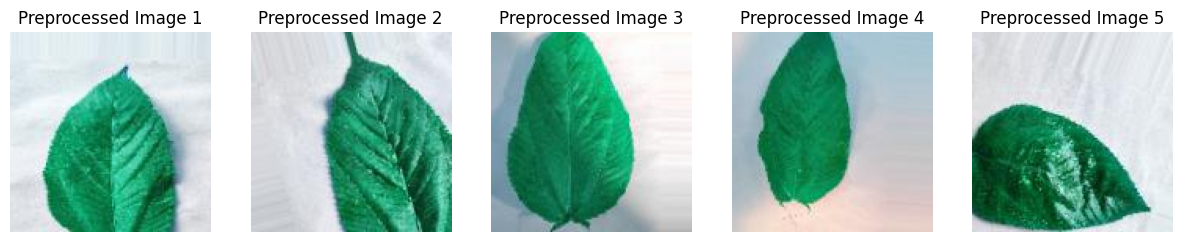

Visualizing preprocessed Cescospora Leaf Spot images:


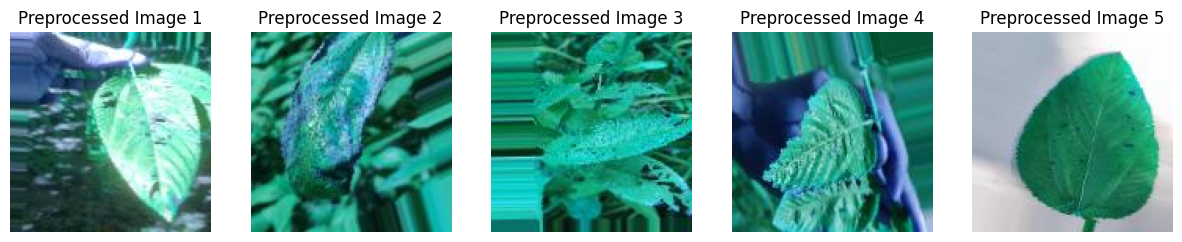

Visualizing preprocessed Golden Mosaic images:


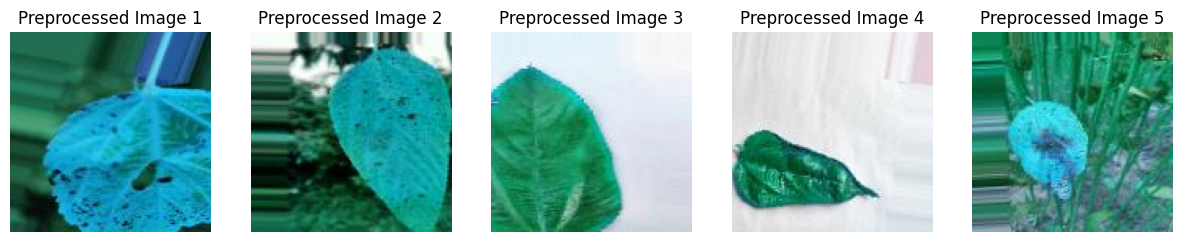

In [5]:
import os
import random
import numpy as np
import cv2  # For image processing
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import

# Define the full dataset directory
dataset_dir = '/kaggle/input/jute-leaf-disease-detection/Jute Leaf Disease Detection'
healthy_leaf_dir = os.path.join(dataset_dir, 'Healthy Leaf')
cescospora_dir = os.path.join(dataset_dir, 'Cescospora Leaf Spot')
golden_mosaic_dir = os.path.join(dataset_dir, 'Golden Mosaic')

# Create directories to save preprocessed images
output_base_dir = '/kaggle/working/preprocessed_images'
os.makedirs(output_base_dir, exist_ok=True)

# Directories for output images
output_healthy_leaf_dir = os.path.join(output_base_dir, 'Preprocessed Healthy Leaf')
output_cescospora_dir = os.path.join(output_base_dir, 'Preprocessed Cescospora Leaf Spot')
output_golden_mosaic_dir = os.path.join(output_base_dir, 'Preprocessed Golden Mosaic')
os.makedirs(output_healthy_leaf_dir, exist_ok=True)
os.makedirs(output_cescospora_dir, exist_ok=True)
os.makedirs(output_golden_mosaic_dir, exist_ok=True)

# Function to preprocess an image
def preprocess_image(image):
    # Resize the image
    image = cv2.resize(image, (128, 128))  # Resize to 128x128 or any desired size
    # Normalize the image
    image = image / 255.0  # Scale pixel values to [0, 1]
    return image

# Function to preprocess and save images with augmentation
def preprocess_and_save_images(input_dir, output_dir, augment=False):
    if augment:
        # Create an ImageDataGenerator for augmentation
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
    
    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        
        # Read the image
        image = cv2.imread(img_path)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(image)

        # If augmentation is enabled, create augmented images
        if augment:
            preprocessed_image = preprocessed_image.reshape((1,) + preprocessed_image.shape)  # Reshape for generator
            i = 0
            for batch in datagen.flow(preprocessed_image, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpg'):
                i += 1
                if i >= 5:  # Save 5 augmented images
                    break
        else:
            # Save the preprocessed image to the corresponding output folder
            output_img_path = os.path.join(output_dir, img_file)
            cv2.imwrite(output_img_path, (preprocessed_image * 255).astype(np.uint8))

# Preprocess Healthy Leaf images with augmentation
print("Preprocessing and augmenting Healthy Leaf images...")
preprocess_and_save_images(healthy_leaf_dir, output_healthy_leaf_dir, augment=True)

# Preprocess Cescospora Leaf Spot images with augmentation
print("Preprocessing and augmenting Cescospora Leaf Spot images...")
preprocess_and_save_images(cescospora_dir, output_cescospora_dir, augment=True)

# Preprocess Golden Mosaic images with augmentation
print("Preprocessing and augmenting Golden Mosaic images...")
preprocess_and_save_images(golden_mosaic_dir, output_golden_mosaic_dir, augment=True)

print("Preprocessing complete. Preprocessed images are saved.")

# Function to visualize preprocessed images
def visualize_preprocessed_images(directory, num_images=5):
    # Get a list of all preprocessed images in the specified folder
    preprocessed_images = os.listdir(directory)
    
    # Select random images to display
    selected_images = random.sample(preprocessed_images, num_images)
    
    # Plot the selected images
    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(directory, img_file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f'Preprocessed Image {i + 1}')
        plt.axis('off')

    plt.show()

# Visualize a few preprocessed images from each category
print("Visualizing preprocessed Healthy Leaf images:")
visualize_preprocessed_images(output_healthy_leaf_dir)

print("Visualizing preprocessed Cescospora Leaf Spot images:")
visualize_preprocessed_images(output_cescospora_dir)

print("Visualizing preprocessed Golden Mosaic images:")
visualize_preprocessed_images(output_golden_mosaic_dir)



In [6]:
import os

# Define the base directory for the preprocessed images
base_dir = '/kaggle/working/preprocessed_images/'

# Define the directories for the augmented preprocessed images
augmented_healthy_leaf_dir = os.path.join(base_dir, 'Preprocessed Healthy Leaf')  # Keep this as per original save structure
augmented_cescospora_dir = os.path.join(base_dir, 'Preprocessed Cescospora Leaf Spot')  # Keep this as per original save structure
augmented_golden_mosaic_dir = os.path.join(base_dir, 'Preprocessed Golden Mosaic')  # Keep this as per original save structure

# Function to count images in a directory
def count_images(directory):
    if os.path.exists(directory):
        return len([file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))])
    else:
        print(f"Directory {directory} does not exist.")
        return 0

# Count images in the augmented directories
augmented_counts = {s
    'Healthy Leaf': count_images(augmented_healthy_leaf_dir),
    'Cescospora Leaf Spot': count_images(augmented_cescospora_dir),
    'Golden Mosaic': count_images(augmented_golden_mosaic_dir),
}

# Display the counts
for class_name, count in augmented_counts.items():
    print(f"{class_name}: {count} images found.")



Healthy Leaf: 1238 images found.
Cescospora Leaf Spot: 1406 images found.
Golden Mosaic: 1602 images found.


In [11]:
import os

# Define the main dataset directory
dataset_dir = '/kaggle/working/preprocessed_images/'  # Adjust the directory as needed

# Function to count the number of classes (subdirectories)
def count_classes(directory):
    # List directories in the specified directory
    subdirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    return len(subdirs), subdirs

# Count classes in the dataset
num_classes, class_names = count_classes(dataset_dir)

# Display the results
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)



Number of classes: 3
Class names: ['Preprocessed Cescospora Leaf Spot', 'Preprocessed Healthy Leaf', 'Preprocessed Golden Mosaic']


In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the base directory for the preprocessed images
base_dir = '/kaggle/working/preprocessed_images/'

# Define the directories for the augmented preprocessed images
augmented_healthy_leaf_dir = os.path.join(base_dir, 'Preprocessed Healthy Leaf')
augmented_cescospora_dir = os.path.join(base_dir, 'Preprocessed Cescospora Leaf Spot')
augmented_golden_mosaic_dir = os.path.join(base_dir, 'Preprocessed Golden Mosaic')

# Count images in the augmented directories
def count_images(directory):
    if os.path.exists(directory):
        return len([file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))])
    else:
        print(f"Directory {directory} does not exist.")
        return 0

# Count images in the augmented directories
augmented_counts = {
    'Healthy Leaf': count_images(augmented_healthy_leaf_dir),
    'Cescospora Leaf Spot': count_images(augmented_cescospora_dir),
    'Golden Mosaic': count_images(augmented_golden_mosaic_dir),
}

# Display the counts
for class_name, count in augmented_counts.items():
    print(f"{class_name}: {count} images found.")

# Parameters
img_width, img_height = 128, 128  # Smaller size to reduce training time
batch_size = 32
epochs = 20
train_data_dir = base_dir  # Update this to the correct directory for training data

# Define the ImageDataGenerators without further augmentation
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # You can change the number of neurons as needed
predictions = Dense(3, activation='softmax')(x)  # 3 classes

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Display counts of images found in each category
for class_name, count in augmented_counts.items():
    print(f"{class_name}: {count} images found.")

    

Healthy Leaf: 1238 images found.
Cescospora Leaf Spot: 1406 images found.
Golden Mosaic: 1602 images found.
Found 4246 images belonging to 3 classes.
Found 4246 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728463636.400608     189 service.cc:145] XLA service 0x7d8ff0004ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728463636.400692     189 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/133 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3371 - loss: 1.4388

I0000 00:00:1728463640.279690     189 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.5865 - loss: 0.8784 - val_accuracy: 0.7770 - val_loss: 0.5172 - learning_rate: 1.0000e-04
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7881 - loss: 0.4860 - val_accuracy: 0.8335 - val_loss: 0.4168 - learning_rate: 1.0000e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8376 - loss: 0.4046 - val_accuracy: 0.8592 - val_loss: 0.3685 - learning_rate: 1.0000e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8707 - loss: 0.3448 - val_accuracy: 0.8851 - val_loss: 0.3191 - learning_rate: 1.0000e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8790 - loss: 0.3320 - val_accuracy: 0.9027 - val_loss: 0.2862 - learning_rate: 1.0000e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9073 - loss: 0.2772 - val_accuracy: 0.9126 - val_loss: 0.2622 - learning_rate: 1.0000e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step


<Figure size 800x600 with 0 Axes>

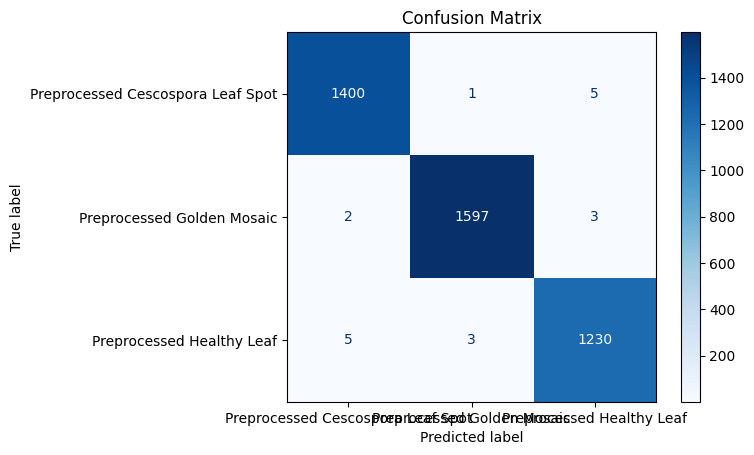

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get the true labels and predicted labels
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Get the class labels

# Compute the confusion matrix
cm = confusion_matrix(true_classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()



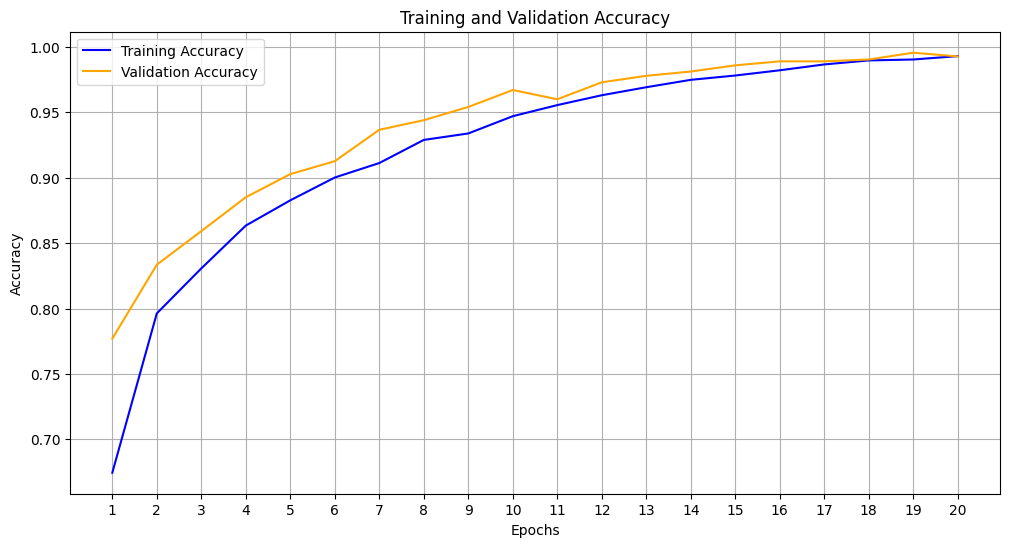

In [18]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.legend()
plt.grid()
plt.show()




Found 4246 images belonging to 3 classes.
Found 4246 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.3639 - loss: 1.0979 - val_accuracy: 0.3382 - val_loss: 1.0792 - learning_rate: 1.0000e-04
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3830 - loss: 1.0699 - val_accuracy: 0.5174 - val_loss: 1.0616 - learning_rate: 1.0000e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4554 - loss: 1.0507 - val_accuracy: 0.4675 - val_loss: 1.0354 - learning_rate: 1.0000e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4651 - loss: 1.0304 - val_accuracy: 0.4812 - val_loss: 1.0194 - learning_rate: 1.0000e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.4846 - loss: 1.0163 - val_accuracy: 0.5586 - val_loss: 1.0005 - learning_rate: 1.0000e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5111 - loss: 0.9975 - val_accuracy: 0.5139 - val_loss: 0.9784 - learning_rate: 1.0000e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.

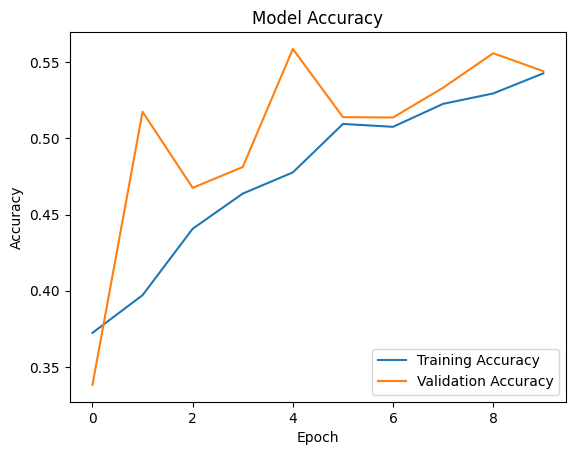

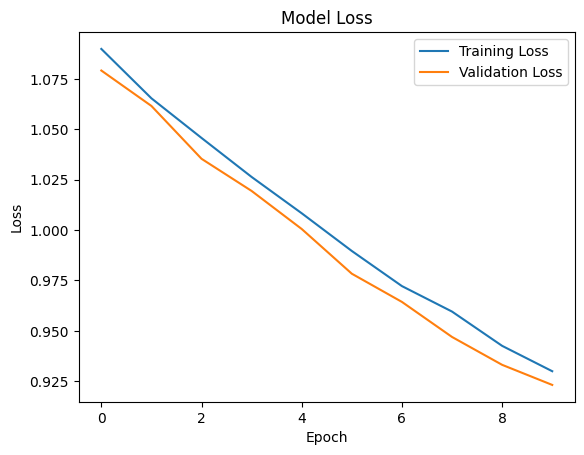

In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the base directory for the preprocessed images
base_dir = '/kaggle/working/preprocessed_images/'

# Parameters
img_width, img_height = 128, 128
batch_size = 32
epochs = 20

# Define the ImageDataGenerators without further augmentation
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Use ResNet50 with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # You can change the number of neurons as needed
predictions = Dense(3, activation='softmax')(x)  # 3 classes (Healthy Leaf, Cescospora, Golden Mosaic)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# After training, plot the results
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step


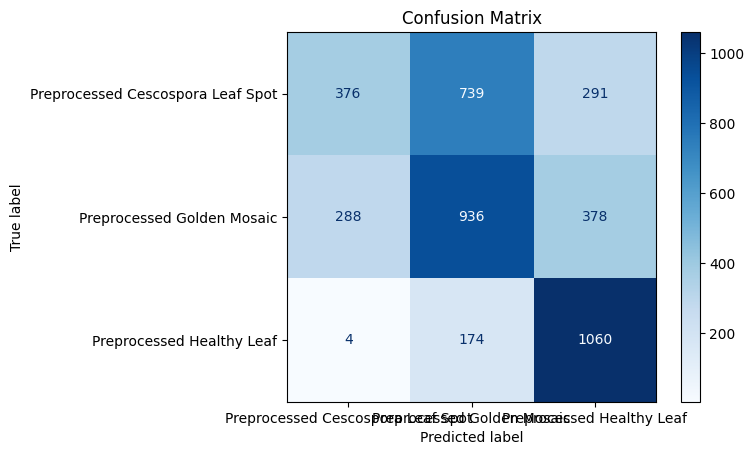

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

# Get the ground truth labels and predictions for the validation data
validation_generator.reset()  # Reset generator for accurate prediction processing
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Found 4246 images belonging to 3 classes.
Found 4246 images belonging to 3 classes.


/tmp/ipykernel_30/636701531.py:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/133 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6681 - loss: 0.7247

I0000 00:00:1728464670.195209     188 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_fusion_82', 4 bytes spill stores, 4 bytes spill loads



133/133 ━━━━━━━━━━━━━━━━━━━━ 186s 585ms/step - accuracy: 0.6802 - loss: 0.7011 - val_accuracy: 0.8373 - val_loss: 0.3822 - learning_rate: 1.0000e-04
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.9425 - loss: 0.1563 - val_accuracy: 0.8851 - val_loss: 0.2703 - learning_rate: 1.0000e-04
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.9806 - loss: 0.0619 - val_accuracy: 0.8945 - val_loss: 0.2747 - learning_rate: 1.0000e-04
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.9852 - loss: 0.0414 - val_accuracy: 0.8646 - val_loss: 0.3951 - learning_rate: 1.0000e-04
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9847 - loss: 0.0446
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.9847 - loss: 0.0448 - val_accuracy: 0.8825 - val_loss: 0.5667 - learning_rate: 1.0000e-04
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accur

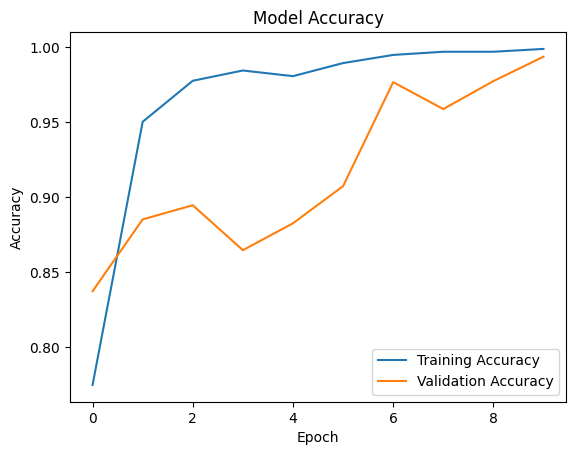

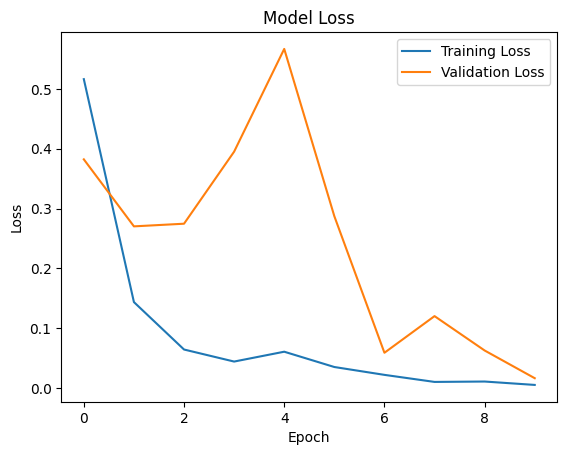

133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step


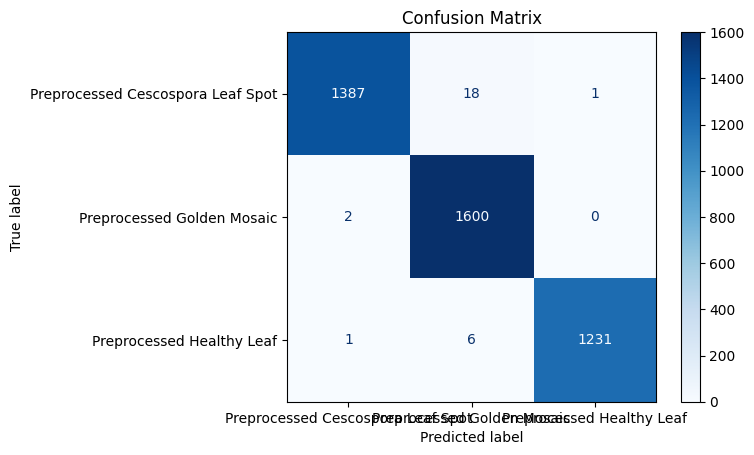

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the base directory for the preprocessed images
base_dir = '/kaggle/working/preprocessed_images/'

# Parameters
img_width, img_height = 128, 128
batch_size = 32
epochs = 10

# Define the ImageDataGenerators without further augmentation
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define input for the models
input_layer = Input(shape=(img_width, img_height, 3))

# Load MobileNetV2 with ImageNet pre-trained weights
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_model.output)

# Load InceptionV3 with ImageNet pre-trained weights
inception_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_layer)
inception_output = GlobalAveragePooling2D()(inception_model.output)

# Concatenate the outputs from both models
combined_output = Concatenate()([mobilenet_output, inception_output])

# Add custom layers on top
x = Dense(256, activation='relu')(combined_output)
predictions = Dense(3, activation='softmax')(x)  # 3 classes (Healthy Leaf, Cescospora, Golden Mosaic)

# Create the final model
model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# After training, plot the results
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Generate predictions for the validation set
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the validation generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step


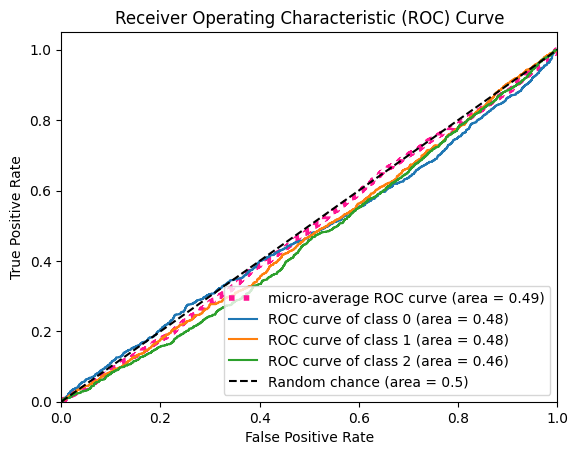

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have three classes
num_classes = 3

# Binarize the output for multi-class ROC
true_classes = label_binarize(true_classes, classes=[0, 1, 2])
predicted_probabilities = model.predict(validation_generator)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_classes.ravel(), predicted_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {:.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random chance (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


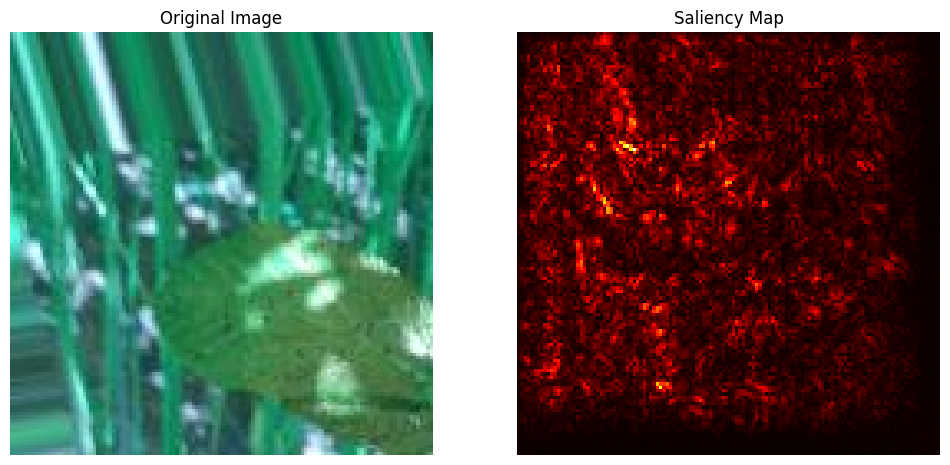

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf

# Function to preprocess an image for the model
def preprocess_image(img):
    img = tf.convert_to_tensor(img)
    img = tf.image.resize(img, [img_width, img_height])  # Resize to match model input
    img = img / 255.0  # Normalize to [0, 1]
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to generate saliency map
def generate_saliency_map(model, img):
    # Record the gradients
    with tf.GradientTape() as tape:
        tape.watch(img)
        predictions = model(img)
        class_idx = tf.argmax(predictions[0])  # Get the index of the predicted class
        loss = predictions[0][class_idx]  # Use the class score for the loss

    # Compute gradients of the class score with respect to the input image
    grads = tape.gradient(loss, img)

    # Get the saliency map (absolute value of the gradients)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1).numpy()
    return saliency

# Load a sample image from the validation set
# Use next() function with validation_generator
sample_image, sample_label = next(iter(validation_generator))  # Get the next batch
sample_image = sample_image[0]  # Take the first image from the batch

# Preprocess the image
processed_image = preprocess_image(sample_image)

# Generate the saliency map
saliency_map = generate_saliency_map(model, processed_image)

# Plot the original image and the saliency map
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

# Saliency map
plt.subplot(1, 2, 2)
plt.imshow(saliency_map[0], cmap='hot')
plt.title("Saliency Map")
plt.axis('off')

plt.show()


